In [91]:
import pandas as pd
from scipy import stats
import seaborn as sns

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
ks = pd.read_csv('../../Data/ks.csv', index_col=0)

In [94]:
ks

name  \
ID                                                              
1000002330                    The Songs of Adelaide & Abullah   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
1000004038                                     Where is Hank?   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
1000011046  Community Film Project: The Art of Neighborhoo...   
...                                                       ...   
999976400   ChknTruk Nationwide Charity Drive 2014 (Canceled)   
999977640                                           The Tribe   
999986353   Walls of Remedy- New lesbian Romantic Comedy f...   
999987933                            BioDefense Education Kit   
999988282                   Nou Renmen Ayiti!  We Love Haiti!   

                   category main_category currency    deadline     goal  \
ID                                                                        
1000002330           Poetry    Publishing      GBP  2015-10-09   1000.0   
1000003930   Narrative Film  Film & Video      USD  2017-11-01  30000.0   
1000004038   Narrative Film  Film & Video      USD  2013-02-26  45000.0   
1000007540            Music         Music      USD  2012-04-16   5000.0   
1000011046     Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                     ...           ...      ...         ...      ...   
999976400       Documentary  Film & Video      USD  2014-10-17  50000.0   
999977640    Narrative Film  Film & Video      USD  2011-07-19   1500.0   
999986353    Narrative Film  Film & Video      USD  2010-08-16  15000.0   
999987933        Technology    Technology      USD  2016-02-13  15000.0   
999988282   Performance Art           Art      USD  2011-08-16   2000.0   

                       launched  pledged     state  backers country  \
ID                                                                    
1000002330  2015-08-11 12:12:28      0.0    failed        0      GB   
1000003930  2017-09-02 04:43:57   2421.0    failed       15      US   
1000004038  2013-01-12 00:20:50    220.0    failed        3      US   
1000007540  2012-03-17 03:24:11      1.0    failed        1      US   
1000011046  2015-07-04 08:35:03   1283.0  canceled       14      US   
...                         ...      ...       ...      ...     ...   
999976400   2014-09-17 02:35:30     25.0  canceled        1      US   
999977640   2011-06-22 03:35:14    155.0    failed        5      US   
999986353   2010-07-01 19:40:30     20.0    failed        1      US   
999987933   2016-01-13 18:13:53    200.0    failed        6      US   
999988282   2011-07-19 09:07:47    524.0    failed       17      US   

            usd pledged  usd_pledged_real  usd_goal_real  
ID                                                        
1000002330          0.0               0.0        1533.95  
1000003930        100.0            2421.0       30000.00  
1000004038        220.0             220.0       45000.00  
1000007540          1.0               1.0        5000.00  
1000011046       1283.0            1283.0       19500.00  
...                 ...               ...            ...  
999976400          25.0              25.0       50000.00  
999977640         155.0             155.0        1500.00  
999986353          20.0              20.0       15000.00  
999987933         200.0             200.0       15000.00  
999988282         524.0             524.0        2000.00  

[378661 rows x 14 columns]

In [95]:
ks.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [96]:
idxs = ks.pledged > 0

In [97]:
idxs

ID
1000002330    False
1000003930     True
1000004038     True
1000007540     True
1000011046     True
              ...  
999976400      True
999977640      True
999986353      True
999987933      True
999988282      True
Name: pledged, Length: 378661, dtype: bool

In [98]:
positive_pledged = ks.pledged.loc[idxs]

In [99]:
positive_pledged

ID
1000003930     2421.0
1000004038      220.0
1000007540        1.0
1000011046     1283.0
1000014025    52375.0
               ...   
999976400        25.0
999977640       155.0
999986353        20.0
999987933       200.0
999988282       524.0
Name: pledged, Length: 326134, dtype: float64

In [100]:
len(positive_pledged.values)

326134

In [101]:
normalized_pledged = pd.Series(stats.boxcox(positive_pledged)[0], index=positive_pledged.index, name='normalized_pledged')

In [102]:
normalized_pledged

ID
1000003930    10.013887
1000004038     6.403367
1000007540     0.000000
1000011046     9.005193
1000014025    15.499596
                ...    
999976400      3.562025
999977640      5.919593
999986353      3.291544
999987933      6.270664
999988282      7.648440
Name: normalized_pledged, Length: 326134, dtype: float64

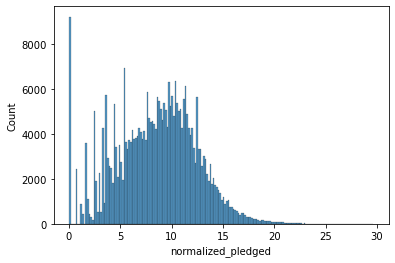

In [103]:
sns.histplot(normalized_pledged);